In [39]:
from py_ball import league

# 1) Re-use the dict you built for requests.get(...)
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    ),
    "Referer": "https://stats.nba.com/",
    "Accept": "application/json, text/plain, */*",
}

# 2) Pass that dict — not the Response — into League(...)
league_id = '00'  # WNBA
franchises = league.League(
    headers=headers,
    endpoint="leaguegamelog",
    league_id=league_id,
    season_id="2023-2024",
    season_type="Playoffs"
)



In [57]:
import pandas as pd
import matplotlib.pyplot as plt

season_df = pd.DataFrame(franchises.data["LeagueGameLog"])

In [41]:
season_df['GAME_DATE'] = pd.to_datetime(season_df['GAME_DATE'])

/Users/ozcankures/Desktop/projeler-genel/venv/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


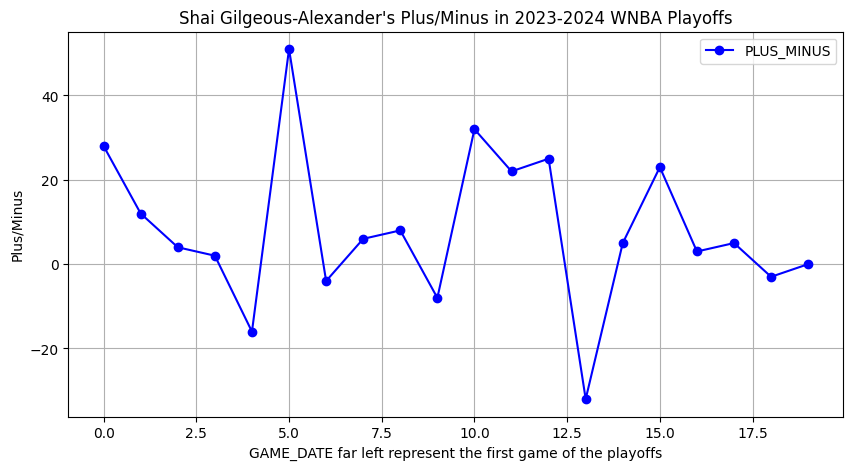

In [63]:
season_df[season_df.PLAYER_NAME.str.contains("Shai")].sort_values(by = "GAME_DATE")["PLUS_MINUS"].reset_index(drop=True).plot(
marker ='o',
title="Shai Gilgeous-Alexander's Plus/Minus in 2023-2024 WNBA Playoffs",
xlabel='GAME_DATE far left represent the first game of the playoffs',
ylabel="Plus/Minus",
figsize=(10, 5),
grid=True,
legend=True,
style='-o',
color='blue',

x_compat=True,  

)
plt.show()

In [46]:
season_df.sort_values(by='PTS', ascending= False)

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
729,42024,1628378,Donovan Mitchell,1610612739,CLE,Cleveland Cavaliers,0042400202,2025-05-06,CLE vs. IND,L,...,5,9,4,1,5,4,48,13,77.5,1
473,42024,203999,Nikola Jokić,1610612743,DEN,Denver Nuggets,0042400225,2025-05-13,DEN @ OKC,L,...,15,5,2,0,2,4,44,-8,73.5,1
1129,42024,1630162,Anthony Edwards,1610612750,MIN,Minnesota Timberwolves,0042400164,2025-04-27,MIN vs. LAL,W,...,9,6,0,1,1,2,43,3,64.8,1
1025,42024,1627750,Jamal Murray,1610612743,DEN,Denver Nuggets,0042400175,2025-04-29,DEN vs. LAC,W,...,5,7,3,1,1,2,43,17,70.5,1
290,42024,1628973,Jalen Brunson,1610612752,NYK,New York Knicks,0042400301,2025-05-21,NYK vs. IND,L,...,1,5,0,0,7,5,43,-8,44.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,42024,1630541,Moses Moody,1610612744,GSW,Golden State Warriors,0042400231,2025-05-06,GSW @ MIN,W,...,0,0,0,0,0,0,0,-14,0.0,1
115,42024,1628418,Thomas Bryant,1610612754,IND,Indiana Pacers,0042400305,2025-05-29,IND @ NYK,L,...,1,0,0,0,0,0,0,5,1.2,1
1501,42024,1628418,Thomas Bryant,1610612754,IND,Indiana Pacers,0042400132,2025-04-22,IND vs. MIL,W,...,2,0,0,1,1,1,0,5,4.4,1
1500,42024,1631260,AJ Green,1610612749,MIL,Milwaukee Bucks,0042400132,2025-04-22,MIL @ IND,L,...,2,1,0,0,0,1,0,3,3.9,1
